# Poisson-Gamma model

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-25)_

# Case study 01: asthma mortality

Example adapted from Gelman et al (2014), _Bayesian Data Analysis - 3rd edition (BDA3),_ p. 45.

Causes of death are reviewed in detail for a city in the United States for a single year. It is found that 3 persons, out of a population of 200,000, died of asthma, giving a crude estimated asthma mortality rate in the city of 1.5 cases per 100,000 persons per year. 

## Likelihood 

A Poisson sampling model is often used for epidemiological data of this form. The Poisson model derives from an assumption of _exchangeability_ among all small intervals of exposure. 

Under the Poisson model, the sampling distribution of $y$, the number of deaths in a city of 200,000 in one year, may be expressed as:

$$
    \textrm{Poisson}(2.00\cdot\theta),
$$

where $\theta$ represents the true underlying long-term asthma mortality rate in our city (measured in cases per 100,000 persons per year).

## Observed evidence

In the above notation, $y = 3$ is a single observation with exposure $x = 2.0$ (since $\theta$ is defined in units of
100,000 people) and unknown rate $\theta$.

## Prior

Knowledge about asthma mortality rates around the world to construct a prior distribution for $\theta$, then combine the datum $y = 3$ with that prior distribution to obtain a posterior distribution.

What is a sensible prior distribution for $\theta$?   
Reviews suggest mortality rates above 1.5 per 100,000 people are rare in Western countries, with typical asthma mortality rates around 0.6 per 100,000. 

Trial-and-error exploration of the properties of the gamma distribution, the conjugate prior family for this problem, reveals that a $\textrm{Gamma}(3.0, 5.0)$ density provides a plausible prior density for the asthma mortality rate in this example if we assume exchangeability between this city and other cities and this year and other years. 

The mean of this prior distribution is $0.6$ (with a mode of $0.4$), and $97.5\%$ of the mass of the density lies below $1.44$.

Specifying a prior mean sets the ratio of the two gamma parameters, then the shape parameter can be altered by trial and error to match the prior knowledge about the tail of the distribution

## Prior construction from known information

In [1]:
theta.max<-1.5
theta.average<-0.6

In [2]:
# We find alpha and beta for theta~Gamma(alpha,beta) such that 
# Gamma.expectation = alpha/beta = 0.6

# For instance:
alpha<-6
beta<-10

# 1.5 must be a high quantile of this distribution
round(100*pgamma(1.5,shape=alpha,rate=beta),4)

[1] 99.7208

In [3]:
# Too high, try another pair:
alpha<-3
beta<-5
# 1.5 must be a high quantile of this distribution
round(100*pgamma(1.5,shape=alpha,rate=beta),4)

[1] 97.9743

Keep these values, $\alpha=3$, $\beta=5$.

## Posterior

The posterior distribution of $\theta$ for a $\textrm{Gamma}(\alpha,\beta)$ prior distribution is $\textrm{Gamma}(\alpha_{1},\beta_{1})$,

$$
    \left\{\begin{array}{lcl}
    \alpha_{1} &= &\alpha+y,\\[0.2cm]
    \beta_{1}  &=&\beta+x.
    \end{array}\right.
$$

With the prior distribution and data described notation, ($y = 3$, $x = 2.0$), the posterior distribution for $\theta$ is $\textrm{Gamma}(6.0, 7.0)$, which has mean 0.86.

## Posterior updated parameters

In [4]:
y<-3
x<-2
alpha1<-alpha+y
beta1<-beta+x
round(alpha1,3)
round(beta1,3)

[1] 6

[1] 7

In [5]:
Theor.post.mean<-alpha1/beta1
round(Theor.post.mean,3)

[1] 0.857

In [6]:
# A sample from this posterior
N<-10000
z<-rgamma(N,alpha1,beta1)

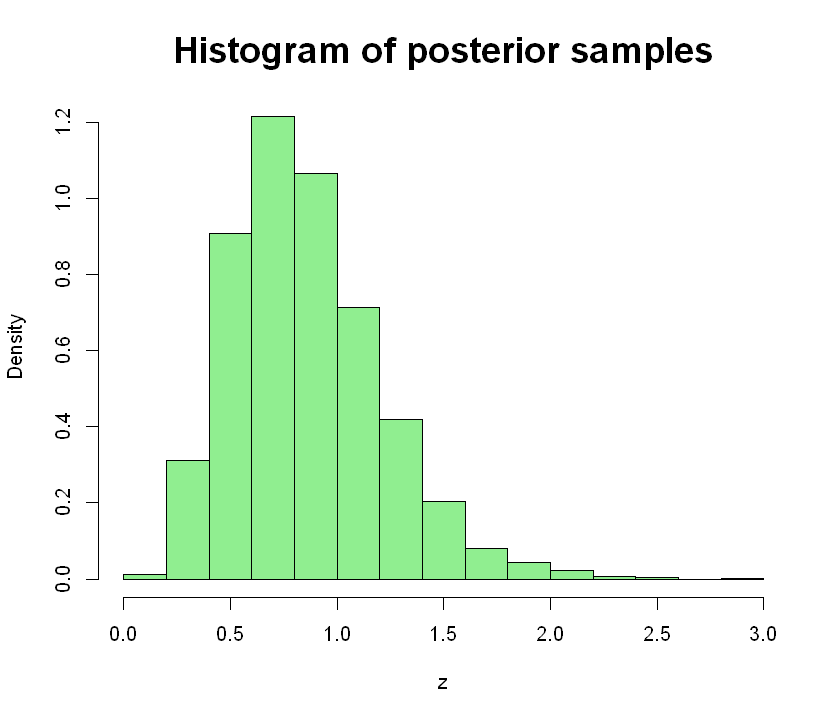

In [7]:
options(repr.plot.width=7,repr.plot.height=6)
hist(z,col="LightGreen",freq=FALSE,
     main="Histogram of posterior samples",cex.main=1.8)

## Posterior with additional data

Assume we have observed $y_2=30$ deaths over 10 years. Assuming the remaining quantities, (population size and overall rate) are invariant, now $x_2=20$ and the posterior pdf is a $\textrm{Gamma}(\alpha+y_2, \beta+x_2)=\textrm{Gamma}(33,25)$.

In [8]:
y2<-30
x2<-20
alpha2<-alpha+y2
beta2<-beta+x2

In [9]:
m2<-alpha2/beta2
round(m2,3)

[1] 1.32

In [10]:
# A sample from this posterior
N<-10000
z<-rgamma(N,alpha2,beta2)

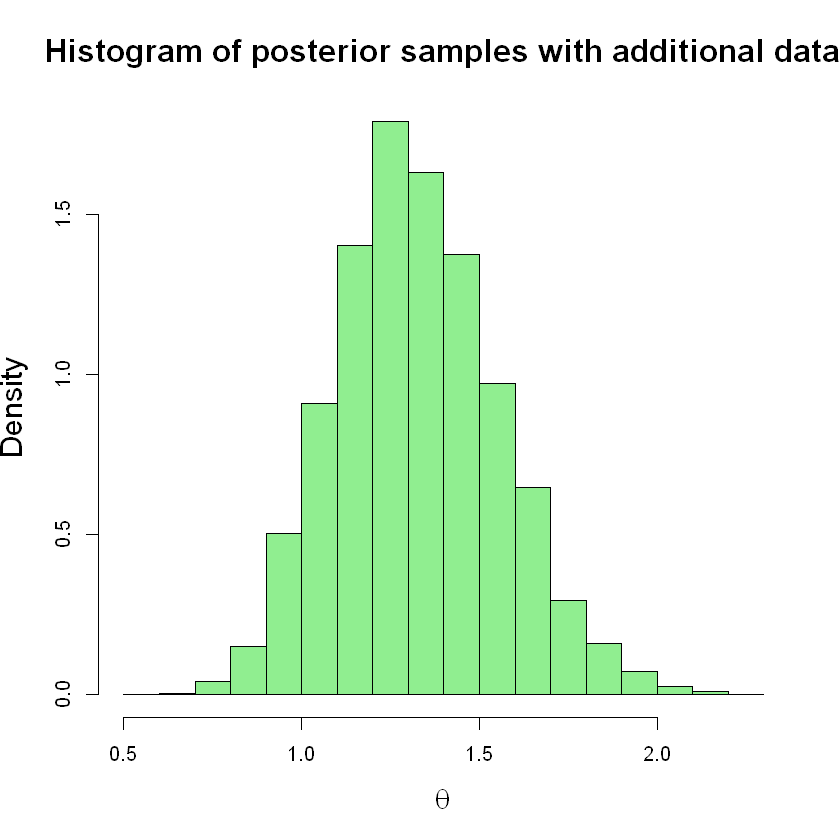

In [11]:
options(repr.plot.width=7,repr.plot.height=7)
hist(z,col="LightGreen",freq=FALSE,xlab=expression(theta),cex.lab=1.5,
     main="Histogram of posterior samples with additional data",cex.main=1.6)

## Exercise

1. Generate a sample from the prior predictive distribution. Compare it to the theoretical one.

2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 

Theoretical mean of prior predictive distribution: 0.6 
Theoretical variance of prior predictive distribution: 0.12 


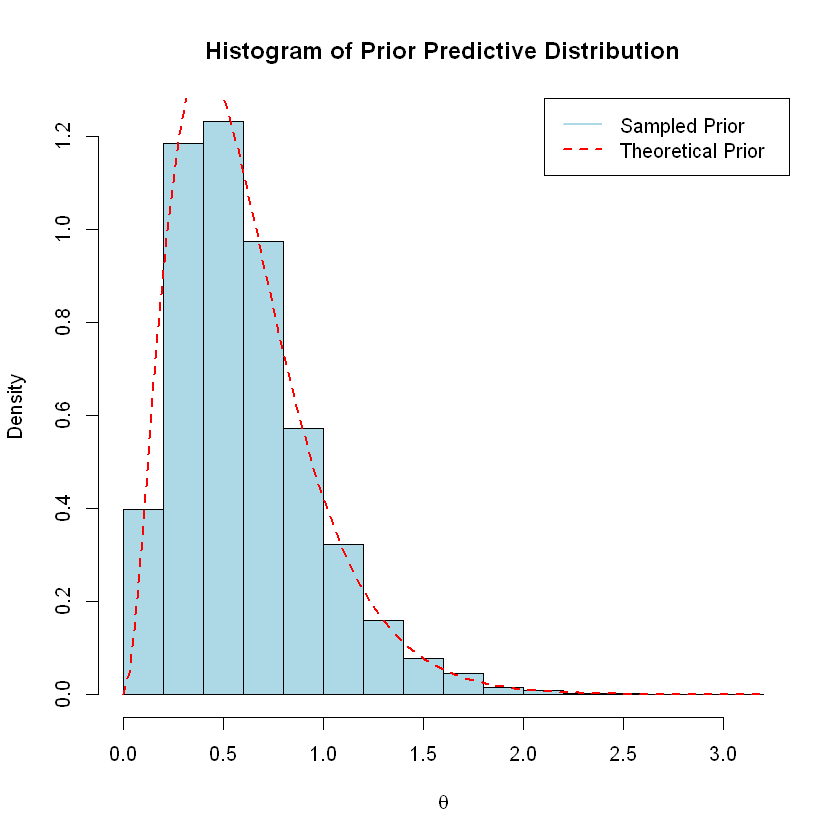

In [12]:
# set the parameters for the prior distribution
alpha <- 3
beta <- 5

# generate a sample from the prior distribution
prior_sample <- rgamma(N, alpha, beta)

# plot the histogram of the prior sample
hist(prior_sample, col="lightblue", freq=FALSE, 
     main="Histogram of Prior Predictive Distribution", 
     xlab=expression(theta), ylab="Density")

# plot the theoretical prior predictive distribution
curve(dgamma(x, shape = alpha, rate = beta), 
      add = TRUE, col = "red", lwd = 2, lty = 2)

# add legend
legend("topright", legend=c("Sampled Prior", "Theoretical Prior"), 
       col=c("lightblue", "red"), lwd=2, lty=c(1,2))

# calculate theoretical mean and variance
theoretical_mean <- alpha / beta
theoretical_variance <- alpha / beta^2

# display theoretical mean and variance
cat("Theoretical mean of prior predictive distribution:", theoretical_mean, "\n")
cat("Theoretical variance of prior predictive distribution:", theoretical_variance, "\n")

Theoretical mean of posterior predictive distribution: 2.999925e-05 
Theoretical variance of posterior predictive distribution: 1.499925e-10 


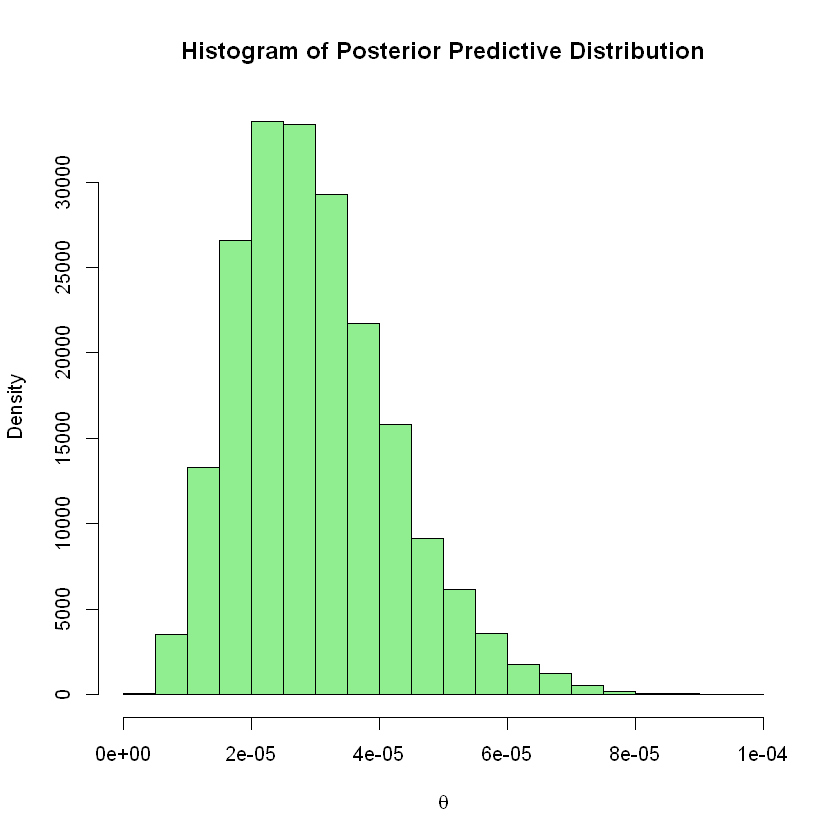

In [13]:
# define the observed data
y_observed <- 3
population_size <- 200000

# update alpha and beta based on the observed data
alpha_posterior <- alpha + y_observed
beta_posterior <- beta + population_size

# generate a sample from the posterior distribution
posterior_sample <- rgamma(N, alpha_posterior, beta_posterior)

# plot the histogram of the posterior sample
hist(posterior_sample, col="lightgreen", freq=FALSE, 
     main="Histogram of Posterior Predictive Distribution", 
     xlab=expression(theta), ylab="Density")

# calculate theoretical mean and variance of posterior predictive distribution
theoretical_mean_posterior <- alpha_posterior / beta_posterior
theoretical_variance_posterior <- alpha_posterior / beta_posterior^2

# display theoretical mean and variance
cat("Theoretical mean of posterior predictive distribution:", theoretical_mean_posterior, "\n")
cat("Theoretical variance of posterior predictive distribution:", theoretical_variance_posterior, "\n")